# Part 4 - Statistics


## Sampling and testing

### Random sampling

#### Simple random data

Numpy offers several routines to generate easily uniform and random samples.

In [5]:
import numpy as np
import numpy.random as rdm
np.set_printoptions(precision=2)

In [6]:
rdm.rand(4, 4) # Uniform sampling

array([[ 0.98,  0.98,  0.38,  0.58],
       [ 0.36,  0.66,  0.66,  0.79],
       [ 0.23,  0.67,  0.49,  0.66],
       [ 0.15,  0.5 ,  0.98,  0.87]])

In [7]:
rdm.randn(4, 4) # Standard normal sampling

array([[ 0.29,  0.03, -0.98,  0.64],
       [-0.42, -1.73,  1.32, -0.09],
       [-0.95, -0.06, -0.13, -2.32],
       [ 0.84,  0.51,  0.67,  0.85]])

In [10]:
rdm.randint(0, 10, size=(4, 4)) # Descrete uniform sampling (10 exclusive)

array([[2, 5, 1, 0],
       [8, 6, 0, 4],
       [9, 6, 7, 8],
       [7, 7, 5, 3]])

In the case where the sampled integers are supposed to index an array, one can replace

In [11]:
a = np.arange(10) * 10

ind = rdm.randint(0, 5, size=7)
a[ind]

array([30, 10, 20, 10, 30, 40,  0])

by

In [12]:
rdm.choice(a, size=7)

array([20, 90, 40, 60, 10, 90, 80])

The previous routines sample integers with replacement. To sample without replacement, one can use.

In [13]:
rdm.permutation(10)[:7] # 7 first item of a random permutation of [0, …, 9]

array([1, 3, 9, 8, 6, 4, 2])

Note that one can also directly permute an array with a copy (permutation) or in-place (shuffle), instead of generating random indexes.

### Random generator

It is obvious that random generators used in scientific computing are in fact pseudo-random generators. As a consequence, the practitioner is able to control them to a certain extent. In a way, this is good news for reproducible science!

Both examples below illustrate how to replay a random sampling.

In [15]:
for it in range(3):
    rdm.seed(it) # Seed the generator to the current iteration number
    print(rdm.randint(100, size=3))

[44 47 64]
[37 12 72]
[40 15 72]


In [17]:
for it in range(3):
    rdm.seed(it) # Seed the generator to the current iteration number
    print(rdm.randint(100, size=3)) # Same as before!

[44 47 64]
[37 12 72]
[40 15 72]


In [18]:
s = rdm.get_state() # Get the internal state of the generator
print(np.array([rdm.randn() for it in range(3)]))
print(rdm.rand(3, 3))

[-2.14  1.64 -1.79]
[[ 0.2   0.62  0.3 ]
 [ 0.27  0.62  0.53]
 [ 0.13  0.51  0.18]]


In [19]:
rdm.set_state(s) # Set the internal state of the generator to its previous value
for it in range(3):
    print(rdm.randn(1)) # Same as before

[-2.14]
[ 1.64]
[-1.79]


### Distributions

Besides the previous routines, Numpy offers the possibility to draw samples from numerous distributions.

In [20]:
x = rdm.poisson(lam=4, size=500)
print(x[:30])

[3 4 5 2 2 2 4 6 6 3 2 1 6 2 5 3 3 5 3 6 7 6 5 3 2 3 2 4 4 3]


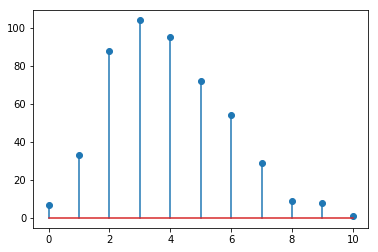

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.stem(np.bincount(x));

## Advanced distributions

### Special functions

Many raw statistical routines (cumulative, survival and inverse function) are available in the scipy.special module.

<Container object of 3 artists>

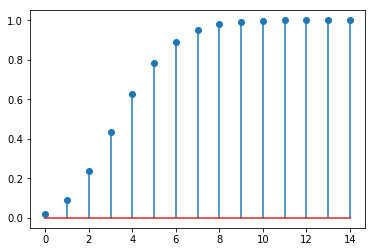

In [23]:
from scipy import special

plt.stem(special.pdtr(range(15), 4)) # Poisson cumulative distribution function

### Random variables

Scipy.stats implements random variables with two different classes: continuous random variables and discrete random variables. As an example, we focus here on the gamma distribution and illustrate the main methods available.

In [24]:
from scipy.stats import gamma

# gamma is a r.v. object corresponding to the standard gamma distribution
print("Distribution support: [{}, {}]".format(gamma.a, gamma.b))
print("Number of shape parameters: {} (name: {})".format(gamma.numargs, gamma.shapes))

Distribution support: [0.0, inf]
Number of shape parameters: 1 (name: a)


The shape parameter `a` appears in the probability density function:

Since the shape parameter aa is required, one has to specify it for each method.

In [25]:
print("Mean:", gamma.mean(a=4))
print("Median:", gamma.median(a=4))
print("Variance:", gamma.var(a=4))

Mean: 4.0
Median: 3.67206074885
Variance: 4.0


wo other parameters can be passed to the methods: loc and scale. They correspond to shifting and rescaling the input of the pdf with x↦(x/locscale).

In [26]:
print("Mean:", gamma.mean(a=4, loc=2, scale=0.1))

Mean: 2.4


Since, passing those parameters time and again can become quite bothersome, one can freeze a random variable.

In [27]:
rv = gamma(a=4, loc=2, scale=2)
print("Mean:", rv.mean())

Mean: 10.0


Now, let us have a look to the available methods.

In [28]:
print(rv.rvs(size=10))  # Drawn a random sample

[  6.56  12.79   7.     5.77   9.22  12.33  11.39  13.    12.25  15.21]


In [29]:
for n in range(4):
    print("Moment {}:".format(n), rv.moment(n))

Moment 0: 1.0
Moment 1: 10.0
Moment 2: 116.0
Moment 3: 1544.0


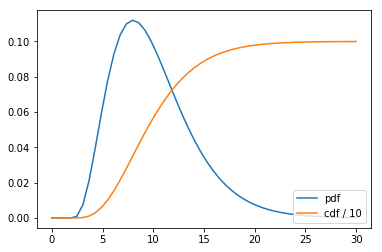

In [30]:
x = np.linspace(0, 30, num=50)

plt.plot(x, rv.pdf(x), label='pdf')  # Probability density function
plt.plot(x, rv.cdf(x)/10, label='cdf / 10')  # Cumulative density function
plt.legend(loc="lower right");

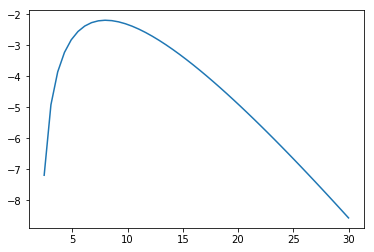

In [31]:
plt.plot(x, rv.logpdf(x), label='log pdf');  # Log of the pdf

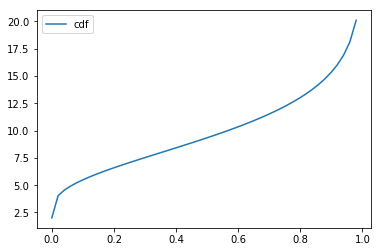

In [32]:
x = np.linspace(0, 1, num=50)
plt.plot(x, rv.ppf(x), label='cdf')  # Percent point function (inverse of cdf) 
plt.legend(loc="upper left");

In [33]:
m = rv.expect(lambda x: np.exp(-x))  # Expectation of a function
print("First exponential moment: {0:0.2e}".format(m))

First exponential moment: 1.67e-03


Note that an unfrozen random variable (for instance gamma, not rv) benefits from two other methods: fit and fit_loc_scale for estimating parameters respectively by likelihood maximization and the moment method.

### Descriptive statistics

#### Order statistics, moments and correlation

Basic descriptive statistics such as min, max, mean, median, std, variance and percentiles can be computed with array methods or routines from Numpy. Other empirical statistics such as mode and moments can be obtained with Scipy statistical functions.

#### Histograms

A common task in statisics is to estimate the pdf of a random variable, what is called density estimation. In a first approach, this task can be achieved by computing a histogram.

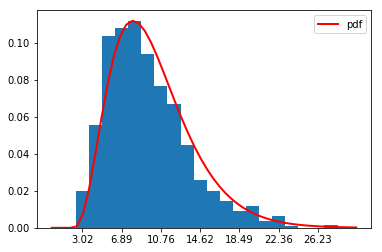

In [38]:
x = rv.rvs(size=1000) # Draw a random sample

# Plot the histogram
hist, bins = np.histogram(x, bins=20, normed=True)
plt.bar(bins[:-1], hist, width=bins[1]-bins[0])
plt.xticks(bins[::3], ["{0:0.2f}".format(t) for t in bins[::3]]);

x_pdf = np.linspace(0, 30, num=50)
plt.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
plt.legend();

Alternatively,one can use Matplotlib to produce fancy plots.

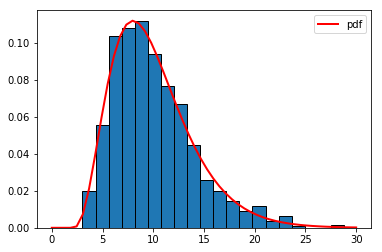

In [39]:
(hist_plt, bins_plt, patches) = plt.hist(x, bins=20, normed=True, edgecolor="black")
plt.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
plt.legend();

#### Kernel density estimation

Kernel desity estimation is a tool more efficient than a histogram for density estimation. In Python kde can be performed with the gaussian_kde function.

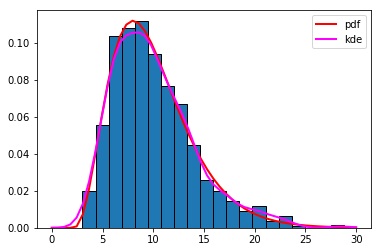

In [40]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(x)

(hist_plt, bins_plt, patches) = plt.hist(x, bins=20, normed=True, edgecolor='black')
plt.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
plt.plot(x_pdf, kde(x_pdf), color="magenta", linewidth=2, label="kde")
plt.legend();

### Hypothesis testing

#### Analyzing one sample

As for R, many tests can be performed in Python. For instance, a single sample may be analized with:

* ttest_1samp: T-test for the mean of one group of scores;
* kstest: Kolmogorov-Smirnov test for goodness of fit;
* ksone: General Kolmogorov-Smirnov one-sided test;
* chisquare: One-way chi square test;
* anderson: Anderson-Darling test for data coming from a particular distribution.

In [46]:
from scipy import stats

for rv in [stats.expon, stats.norm]:
    tt, pval = stats.ttest_1samp(rv.rvs(size=100), 0)
    print("{} sample: ".format(rv.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.00 (statistics = 9.99)
norm sample: p-value = 0.94 (statistics = -0.08)


```
expon sample: p-value = 0.00 (statistics = 10.73)
norm sample: p-value = 0.15 (statistics = -1.46)
```
On the one hand, the p-value for the exponential sample is small enough that we can reject the null hypothesis that the mean is 00. On the other hand, with high significance levels, we cannot reject the null hypothesis for the normal sample.

Let us now test for a given distribution.

In [50]:
for rv in [stats.expon, stats.norm]:
    tt, pval = stats.kstest(rv.rvs(size=100), "expon")
    print("{} sample: ".format(rv.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.83 (statistics = 0.06)
norm sample: p-value = 0.00 (statistics = 0.47)


```
expon sample: p-value = 0.95 (statistics = 0.05)
norm sample: p-value = 0.00 (statistics = 0.50)
```
Again, the result is as expected.

#### Testing normality

As a special case, several tests exist for assessing the normality of a sample:

* kurtosistest: Tests whether a dataset has normal kurtosis;
* skewtest: Tests whether the skew is different from the normal distribution;
* normaltest: Tests whether a sample differs from a normal distribution (D'Agostino and Pearson's test);
* jarque_bera: Jarque-Bera goodness of fit test on sample data;
shapiro: Shapiro-Wilk test for normality.

In [51]:
for rv in [stats.expon, stats.norm]:
    print("{} sample:".format(rv.name))
    for name, test in [('skew', stats.skewtest), ('kurtosis', stats.kurtosistest)]:
        tt, pval = test(rv.rvs(size=100))
        print("   normal {} test: ".format(name), end="")
        print("   p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample:
   normal skew test:    p-value = 0.00 (statistics = 4.28)
   normal kurtosis test:    p-value = 0.00 (statistics = 4.73)
norm sample:
   normal skew test:    p-value = 0.14 (statistics = -1.46)
   normal kurtosis test:    p-value = 0.94 (statistics = -0.07)


Note that these two tests are combined in the normality test.

In [52]:
for rv in [stats.expon, stats.norm]:
    tt, pval = stats.normaltest(rv.rvs(size=100))
    print("{} sample: ".format(rv.name), end="")
    print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

expon sample: p-value = 0.00 (statistics = 42.57)
norm sample: p-value = 0.83 (statistics = 0.37)


#### Comparing two samples

Again, many tests for two samples are available in the Scipy.stats module:

* ks_2samp: Kolmogorov-Smirnov test for 2 samples;
* ttest_ind: T-test for the means of two independent samples of scores;
* kstwobign: Kolmogorov-Smirnov two-sided test for large N;
* ttest_ind_from_stats: T-test for means of two independent samples from descriptive statistics;
* ttest_rel: T-test on TWO RELATED samples of scores, a and b;
* mannwhitneyu: Mann-Whitney rank test on samples x and y;
* wilcoxon: Wilcoxon signed-rank test;
* kruskal: Kruskal-Wallis H-test for independent samples;
* ansari: Ansari-Bradley test for equal scale parameters;
* bartlett: Bartlett's test for equal variances;
* levene: Levene test for equal variances;
* anderson_ksamp: Anderson-Darling test for k-samples;
* fligner: Fligner-Killeen test for equality of variances;
* median_test: Mood's median test;
* mood: Mood's test for equal scale parameters.

As an example, one can test that two independent samples have identical means or that two independent samples are drawn from the same continuous distribution.

In [55]:
rvs1 = stats.norm.rvs(size=100, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=200, loc=0.1, scale = 2)

tt, pval = stats.ttest_ind(rvs1, rvs2)
print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

p-value = 0.86 (statistics = -0.17)


```
p-value = 0.70 (statistics = -0.38)
```
Here, the p-value is high enough that we cannot reject the null hypothesis that the two samples have identical average values. 

On the other hand, the following statistical test makes it possible to state that the two samples are drawn from different distribution (we reject the null hypothesis that they come from the same distribution).

In [56]:
tt, pval = stats.ks_2samp(rvs1, rvs2)
print("p-value = {0:0.2f} (statistics = {1:0.2f})".format(pval, tt))

p-value = 0.00 (statistics = 0.23)


```
p-value = 0.06 (statistics = 0.16)
```

#### Other tests

* pearsonr: Pearson correlation coefficient and the p-value for testing non-correlation;
* spearmanr: Spearman rank-order correlation coefficient and the p-value to test for non-correlation;
* power_divergence: Cressie-Read power divergence statistic and goodness of fit test;
* friedmanchisquare: Friedman test for repeated measurements;
* chi2_contingency: Chi-square test of independence of variables in a contingency table;
* fisher_exact: Fisher exact test on a 2x2 contingency table.

## Linear models

StatsModels is a scientific module based on Pandas for performing statistical analyses in Python. It provides tools for conducting data exploration, statistical tests and for the estimation of several statistical models. As a statistical package, each estimator in StatsModels comes with an extensive list of result statistics.

### Linear regression

We illustrate here a major feature of StatsModels, which is linear [regression](http://www.statsmodels.org/stable/regression.html#technical-documentation).

#### Simple example

In [58]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
%matplotlib inline

# Geberate data
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [59]:
# Fit the model
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     284.0
Date:                Tue, 02 Jan 2018   Prob (F-statistic):           1.11e-29
Time:                        13:11:49   Log-Likelihood:                -26.851
No. Observations:                  50   AIC:                             61.70
Df Residuals:                      46   BIC:                             69.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4913      0.023     21.652      0.000         0.446     0.537
x2             0.5524      0.089      6.193      0.000         0.373     0.732
x3            -0.0203      0.002    -10.209      0.000        -0.024    -0.016
const          5.0771      0.147     34.512      0.000         4.781     5.373
==============================================================================
Omnibus:                        6.452   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                3.690
Skew:                           0.465   Prob(JB):                        0.158
Kurtosis:                       2.047   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Main attributes of the fitted model are:

In [60]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predict values: ", res.fittedvalues)

Parameters:  [ 0.49  0.55 -0.02  5.08]
Standard errors:  [ 0.02  0.09  0.    0.15]
Predict values:  [  4.57   5.07   5.52   5.91   6.2    6.39   6.5    6.54   6.55   6.57
   6.62   6.74   6.94   7.22   7.58   7.97   8.37   8.75   9.06   9.28
   9.41   9.44   9.4    9.32   9.22   9.15   9.14   9.2    9.35   9.57
   9.85  10.15  10.43  10.67  10.83  10.89  10.85  10.74  10.56  10.36
  10.17  10.03   9.95   9.96  10.05  10.21  10.4   10.59  10.74  10.83]


A method called predict is also available for prediction with the estimator.

In [61]:
res.predict(X) # Same as res.fittedvalues

array([  4.57,   5.07,   5.52,   5.91,   6.2 ,   6.39,   6.5 ,   6.54,
         6.55,   6.57,   6.62,   6.74,   6.94,   7.22,   7.58,   7.97,
         8.37,   8.75,   9.06,   9.28,   9.41,   9.44,   9.4 ,   9.32,
         9.22,   9.15,   9.14,   9.2 ,   9.35,   9.57,   9.85,  10.15,
        10.43,  10.67,  10.83,  10.89,  10.85,  10.74,  10.56,  10.36,
        10.17,  10.03,   9.95,   9.96,  10.05,  10.21,  10.4 ,  10.59,
        10.74,  10.83])

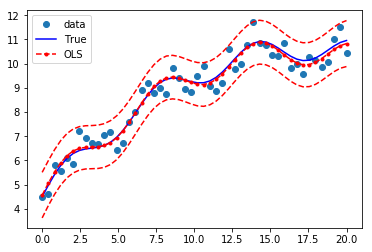

In [62]:
# Plot the regression
prstd, iv_l, iv_u = wls_prediction_std(res)  # Curves for standard deviation

plt.plot(x, y, 'o', label="data")
plt.plot(x, y_true, 'b-', label="True")
plt.plot(x, res.fittedvalues, 'r--.', label="OLS")
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')
plt.legend(loc='best');

In [63]:
residues = y - res.predict(X) # Same as res.resid
print(residues)

[-0.08 -0.47  0.3  -0.36 -0.09 -0.54  0.71  0.38  0.16  0.1   0.45  0.44
 -0.49 -0.5   0.03  0.03  0.53  0.44 -0.27 -0.29 -0.64  0.38  0.01 -0.35
 -0.4   0.34  0.78 -0.14 -0.48 -0.39  0.75 -0.35 -0.44  0.1   0.89 -0.05
 -0.08 -0.36 -0.26  0.5  -0.36 -0.03 -0.39  0.3   0.09 -0.33 -0.35  0.41
  0.76 -0.38]


The sum of squared residuals (or residual sum of squares).

In [64]:
print(np.sum(res.resid**2), res.ssr)

8.5693044975 8.5693044975


While an unbiased estimate of the variance is.

In [65]:
print(res.ssr / res.df_resid) # Same as res.scale

0.186289228207


The hat (or projection matrix).

In [66]:
H = X.dot(np.linalg.solve(X.T.dot(X), X.T))

Then the studentized residuals.

In [67]:
t = res.resid / np.sqrt(res.scale * (1 - np.diag(H))) # Standardized residuals
ts = t * np.sqrt((res.df_resid - 1) / (res.df_resid - t**2)) # Studentized residuals
print(ts) # Similar to res.outlier_test()[:, 0]

[-0.19 -1.17  0.74 -0.88 -0.22 -1.32  1.74  0.9   0.38  0.24  1.08  1.06
 -1.2  -1.2   0.07  0.06  1.25  1.05 -0.64 -0.69 -1.58  0.92  0.03 -0.82
 -0.96  0.82  1.95 -0.34 -1.16 -0.93  1.81 -0.83 -1.05  0.24  2.26 -0.12
 -0.2  -0.86 -0.61  1.19 -0.86 -0.08 -0.96  0.74  0.22 -0.8  -0.85  1.02
  1.99 -0.99]


[]

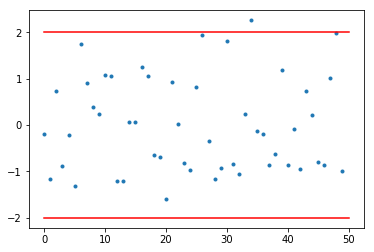

In [68]:
plt.figure()
plt.plot(ts, '.')
plt.plot([0, X.shape[0]], [-2]*2, 'r')
plt.plot([0, X.shape[0]], [2]*2, 'r')
outliers = np.where(res.outlier_test()[:, -1]<0.1)
plt.plot(outliers, res.outlier_test()[outliers, 0], 'ro')

Note that studentized residuals are only asymptotically normal.

In [69]:
from scipy.stats import normaltest, probplot

print(normaltest(ts))

NormaltestResult(statistic=5.307825025910466, pvalue=0.070375329325301661)


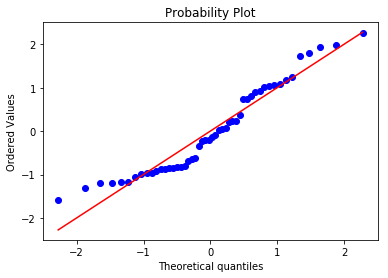

In [70]:
from scipy.stats import t as student_dist

probplot(ts, dist=student_dist(df=res.df_resid-1), plot=plt);

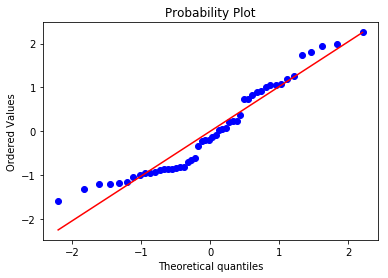

In [71]:
probplot(ts, dist='norm', plot=plt);

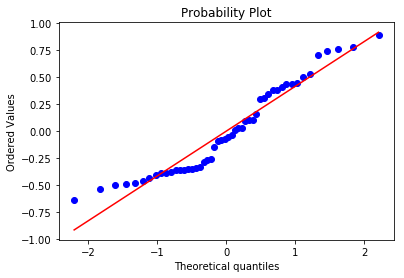

In [72]:
probplot(res.resid, dist='norm', plot=plt);

#### Another example

In [74]:
df = sm.datasets.get_rdataset("iris").data
# Make name pythonic
df.columns = [name.replace(".", "_").lower() for name in df.columns]

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [76]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [77]:
import statsmodels.formula.api as smf

model = smf.ols("sepal_length ~ petal_length + petal_width", data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     241.0
Date:                Tue, 02 Jan 2018   Prob (F-statistic):           4.00e-47
Time:                        17:47:42   Log-Likelihood:                -75.023
No. Observations:                 150   AIC:                             156.0
Df Residuals:                     147   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        4.1906      0.097     43.181      0.000         3.999     4.382
petal_length     0.5418      0.069      7.820      0.000         0.405     0.679
petal_width     -0.3196      0.160     -1.992      0.048        -0.637    -0.002
==============================================================================
Omnibus:                        0.383   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.540
Skew:                           0.060   Prob(JB):                        0.763
Kurtosis:                       2.732   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

StatsModels accepts categorical variables.

In [79]:
model = smf.ols('sepal_length ~ petal_length + petal_width + C(species)', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     185.8
Date:                Tue, 02 Jan 2018   Prob (F-statistic):           5.33e-56
Time:                        17:51:35   Log-Likelihood:                -48.116
No. Observations:                 150   AIC:                             106.2
Df Residuals:                     145   BIC:                             121.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                    3.6830      0.107     34.291      0.000         3.471     3.895
C(species)[T.versicolor]    -1.5984      0.206     -7.770      0.000        -2.005    -1.192
C(species)[T.virginica]     -2.1126      0.304     -6.949      0.000        -2.714    -1.512
petal_length                 0.9059      0.074     12.191      0.000         0.759     1.053
petal_width                 -0.0060      0.156     -0.038      0.969        -0.315     0.303
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.679
Skew:                           0.142   Prob(JB):                        0.712
Kurtosis:                       2.832   Cond. No.                         61.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To regress a variable y on all others, there is no notation equivalent to y `~`. in R. Instead, you can use the following workaround.

In [81]:
def all_predictors(df, outcome):
    return outcome + " ~ " + " + ".join(df.columns.difference([outcome]))

print(all_predictors(df, "sepal_length"))

sepal_length ~ petal_length + petal_width + sepal_width + species


### ANOVA

An analysis of variance in union with a linear regression tests if a categorical explicative variable has an impact on the observed variable or not. In practice, it checks that the mean of the observations is the same regardless of the modalities of the categorical variable.

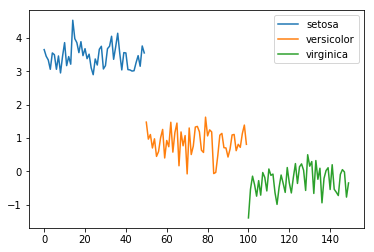

In [84]:
# Obwervations without continuous variable contributions
observations = df["sepal_length"] - res.params["petal_length"] * df["petal_length"] - \
                res.params["petal_length"] * df["petal_width"]
    
plt.plot(observations[df['species']=='setosa'], label="setosa")
plt.plot(observations[df['species']=='versicolor'], label="versicolor")
plt.plot(observations[df['species']=='virginica'], label="virginica")
plt.legend(loc='best');

Intuitively, it seems that the species has an impact on sepal_length since the means are different according to the modalities of species (setosa, versicolor, virginica).

To perform an ANOVA, we first check that the subsamples are normal with equal variances.

In [85]:
from scipy.stats import levene, bartlett, normaltest

for modality in ['setosa', 'versicolor', 'virginica']:
    print(normaltest(observations[df['species']==modality]))

NormaltestResult(statistic=4.2139745757907638, pvalue=0.1216037722795608)
NormaltestResult(statistic=2.3298170303207675, pvalue=0.31195119953270994)
NormaltestResult(statistic=1.4125360760099634, pvalue=0.49348242288116784)


Samples can be considered normaly distributed. What about the variances?

In [86]:
print(levene(observations[df['species']=='setosa'], observations[df['species']=='versicolor'],
             observations[df['species']=='virginica']))
print(bartlett(observations[df['species']=='setosa'], observations[df['species']=='versicolor'],
               observations[df['species']=='virginica']))

LeveneResult(statistic=1.2870792589709708, pvalue=0.27916845176000582)
BartlettResult(statistic=1.5018143329366522, pvalue=0.47193823195211182)


Variances can be considered the same. Let us now display the ANOVA table.

In [88]:
sm.stats.anova_lm(res) # ANOVA table

//anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
//anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
//anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(species),2.0,63.212133,31.606067,274.728446,4.785160e-50
petal_length,1.0,22.274541,22.274541,193.616313,1.718161e-28
petal_width,1.0,0.000169,0.000169,0.001472,9.694469e-01
Residual,145.0,16.681489,0.115045,NaN,NaN


We read the p-value in the last column. For the species, we observe a p-value that is small enough to reject the null hypothesis that the species does not impact the model. In the same manner, we can conclude that petal_length is an important factor (its coefficient is non-zero). However, the p-value for petal_width is large enough to conclude that petal_width has no effect on sepal_length.